The dataset is from Kaggle and contains Data Science job salaries.The table is structured as follow:
 
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
    - *EN*: Entry-level / Junior
    - *MI*: Mid-level / Intermediate
    - *SE*: Senior-level / Expert
    - *EX*: Executive-level / Director
- **employment_type**: The type of employement for the role:
    - *PT*: Part-time
    - *FT*: Full-time
    - *CT*: Contract
    - *FL*: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salaryinusd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
    - *0*: No remote work (less than 20%)
    - *50*: Partially remote
    - *100*: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
    - *S*: less than 50 employees (small)
    - *M*: 50 to 250 employees (medium)
    - *L*: more than 250 employees (large)

In [693]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import country_converter as coco #code for country converter instalation in anaconda:  conda install country_converter (#ATTENTION:this code requires some time in order to run)
import plotly.express as px #code for plotly: conda install -c plotly plotly 
import pycountry_convert as pc #country to continent converter code: pip install pycountry-convert 

from matplotlib import rcParams
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,10)
sns.set_style("whitegrid")




df=pd.read_csv(r'C:\Users\anest\OneDrive\Υπολογιστής\salaries.csv')

In [694]:
#display the first 5 rows
df.head()

work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [695]:
#number of rows and columns in the dataframe
df.shape

(1332, 11)

There are 1332 employee salaries in the dataset.

In [696]:
#dataframe columns
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [697]:
#description of the data
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  1332.000000  1.332000e+03    1332.000000   1332.000000
mean   2021.716216  2.377124e+05  123374.658408     63.851351
std       0.562228  1.077369e+06   65945.872172     45.263587
min    2020.000000  2.324000e+03    2324.000000      0.000000
25%    2022.000000  8.000000e+04   75593.000000      0.000000
50%    2022.000000  1.300000e+05  120000.000000    100.000000
75%    2022.000000  1.751000e+05  164997.000000    100.000000
max    2022.000000  3.040000e+07  600000.000000    100.000000

In [698]:
#dataframe data types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### DATA CLEANING

In [699]:
# Check missing values for each column
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There aren't any null values in the dataset.

In [700]:
#check for duplicates (True value indicates if there are any duplicates)
df.duplicated().value_counts()

False    1069
True      263
dtype: int64

As we observe above there are 263 duplicated values. 

In [701]:
#display some of the duplicated values
duplicate = df[df.duplicated()]
duplicate.head(10)

work_year experience_level employment_type      job_title  salary  \
69        2022               SE              FT  Data Engineer  130000   
76        2022               SE              FT  Data Engineer  170000   
77        2022               SE              FT  Data Engineer  150000   
83        2022               SE              FT  Data Engineer  160000   
108       2022               SE              FT  Data Engineer  160000   
109       2022               SE              FT  Data Engineer  110000   
116       2022               SE              FT  Data Engineer  170000   
117       2022               SE              FT  Data Engineer  130000   
118       2022               SE              FT   Data Analyst  150000   
119       2022               SE              FT   Data Analyst   95000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
69              USD         130000                 US             0   
76              USD         170000                 US             0   
77              USD         150000                 US             0   
83              USD         160000                 US             0   
108             USD         160000                 US             0   
109             USD         110000                 US             0   
116             USD         170000                 US             0   
117             USD         130000                 US             0   
118             USD         150000                 US             0   
119             USD          95000                 US             0   

    company_location company_size  
69                US            M  
76                US            M  
77                US            M  
83                US            M  
108               US            M  
109               US            M  
116               US            M  
117               US            M  
118               US            M  
119               US            M

The above dataset instance, indicates that a lot of salaries, share the same values. Which might be normal, considering the fact that some employees might be compensated with the same salary. We can't evaluate properly, if they are duplicated values, since the dataset is not detailed enough. For this reason, i chose to keep the data as is.

### DATA MODIFICATION

In [702]:
#display the unique values of the experience level column
df['experience_level'].unique()

array(['MI', 'SE', 'EX', 'EN'], dtype=object)

In [703]:
df['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [704]:
df['remote_ratio'].unique()

array([  0, 100,  50], dtype=int64)

In [705]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [706]:
#modification function
def exp_level(x):
    if x=='EN':
        return 'Entry-level'
    elif x=='MI':
        return 'Mid-level'
    elif x=='SE':
        return 'Senior-level'
    else:
        return 'Executive-level'

In [707]:
def emp_type(x):
    if x=='FT':
        return 'Full-time'
    elif x=='PT':
        return 'Part-time'
    elif x=='CT':
        return 'Contract'
    else:
        return 'Freelance'

In [708]:
def remote_r(x):
    if x==0:
        return 'On site'
    elif x==50:
        return 'Hybrid'
    else:
        return 'Remote'

In [709]:
def comp_size(x):
    if x=='M':
        return 'Medium'
    elif x=='L':
        return 'Large'
    else:
        return 'Small'

In [710]:
#apply the function to the dataset
df['experience_level_text']=df['experience_level'].apply(exp_level)

In [711]:
df['employment_type_text']=df['employment_type'].apply(emp_type)

In [712]:
df['remote_ratio_text']=df['remote_ratio'].apply(remote_r)

In [713]:
df['company_size_text']=df['company_size'].apply(comp_size)

In [714]:
df.head(2)

work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   

  company_location company_size experience_level_text employment_type_text  \
0               US            M             Mid-level            Full-time   
1               US            M             Mid-level            Full-time   

  remote_ratio_text company_size_text  
0           On site            Medium  
1           On site            Medium

### DATA EXPLORATION

#### What is the distribution of work year?

In [715]:
#print number of values for every year
df['work_year'].value_counts().rename_axis('Work year').reset_index(name='Counts')

Work year  Counts
0       2022    1029
1       2021     228
2       2020      75

The year 2022 is the year with the most data, followed by 2021 and 2020.

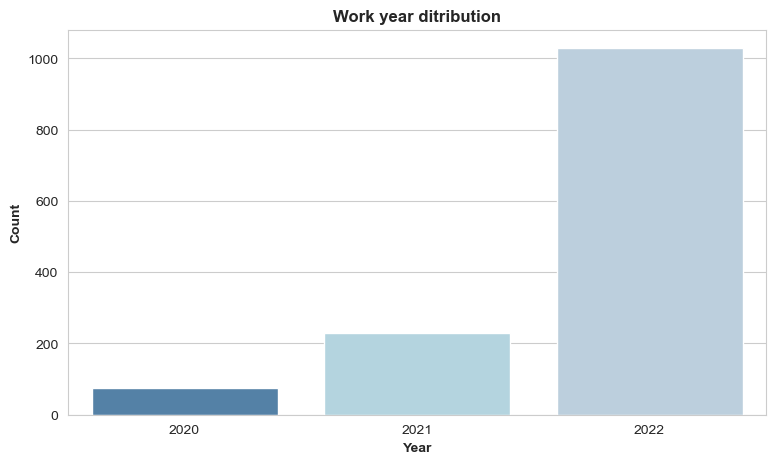

In [716]:
#visualization
fig, ax = plt.subplots(figsize=(9,5))
colors=['#4682B4', 'lightblue', '#B6D0E2']
sns.countplot(x ='work_year', data = df,palette = colors)
plt.title("Work year ditribution",fontweight='bold')
plt.xlabel('Year',fontsize=10,fontweight='bold')
plt.ylabel('Count',fontsize=10,fontweight='bold')
plt.show()

#### What is the distribution of employee residence?

In [717]:
df['employee_residence'].value_counts().rename_axis('Employee residence').reset_index(name='Counts').head()

Employee residence  Counts
0                 US     910
1                 GB      83
2                 IN      45
3                 CA      38
4                 DE      31

Most people, in the dataset, are US residents.

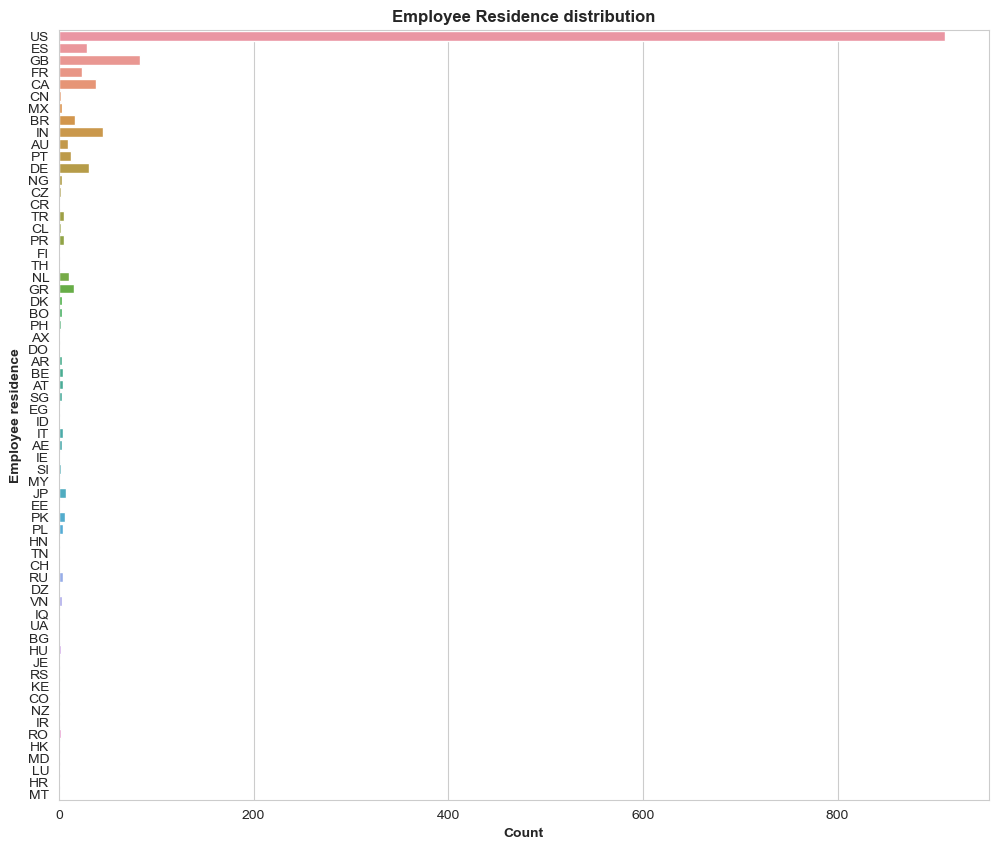

In [718]:
sns.countplot(y='employee_residence', data = df)
plt.title("Employee Residence distribution",fontweight='bold')
plt.ylabel('Employee residence',fontsize=10,fontweight='bold')
plt.xlabel('Count',fontsize=10,fontweight='bold')
plt.show()

#### What is the distribution of company size?

In [719]:
company_counts=df['company_size_text'].value_counts().rename_axis('Company size').reset_index(name='Counts')
company_counts

Company size  Counts
0       Medium     898
1        Large     322
2        Small     112

There are 898 employees working for medium sized companies. Large companies employ 322 and only 112 work in small companies.

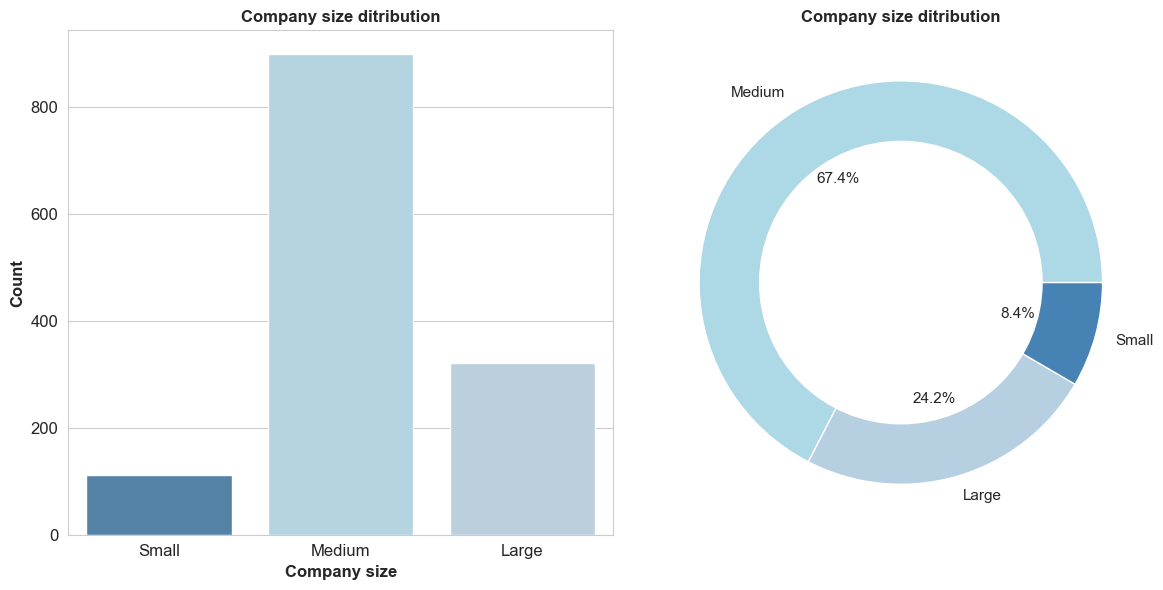

In [774]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(6)
colors=['#4682B4', 'lightblue', '#B6D0E2']
sns.countplot(x ='company_size_text', data = df,order=['Small','Medium','Large'],palette = colors)
plt.title("Company size ditribution",fontweight='bold')
plt.xlabel('Company size',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=12)

plt.subplot(1, 2, 2)
palette_color = ['lightblue','#B6D0E2','#4682B4']
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(company_counts['Counts'], labels=company_counts['Company size'],textprops={"fontsize":11}, autopct='%1.1f%%',
        colors=palette_color) 
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Company size ditribution",fontweight='bold')
plt.tight_layout()

plt.show()

#### What is the distribution of remote ratio?

In [721]:
remote_counts=df['remote_ratio_text'].value_counts().rename_axis('Remote ratio').reset_index(name='Counts')
remote_counts

Remote ratio  Counts
0       Remote     781
1      On site     412
2       Hybrid     139

There are 781 employees working remotely, 412 working on site and 139 working in hybrid mode.

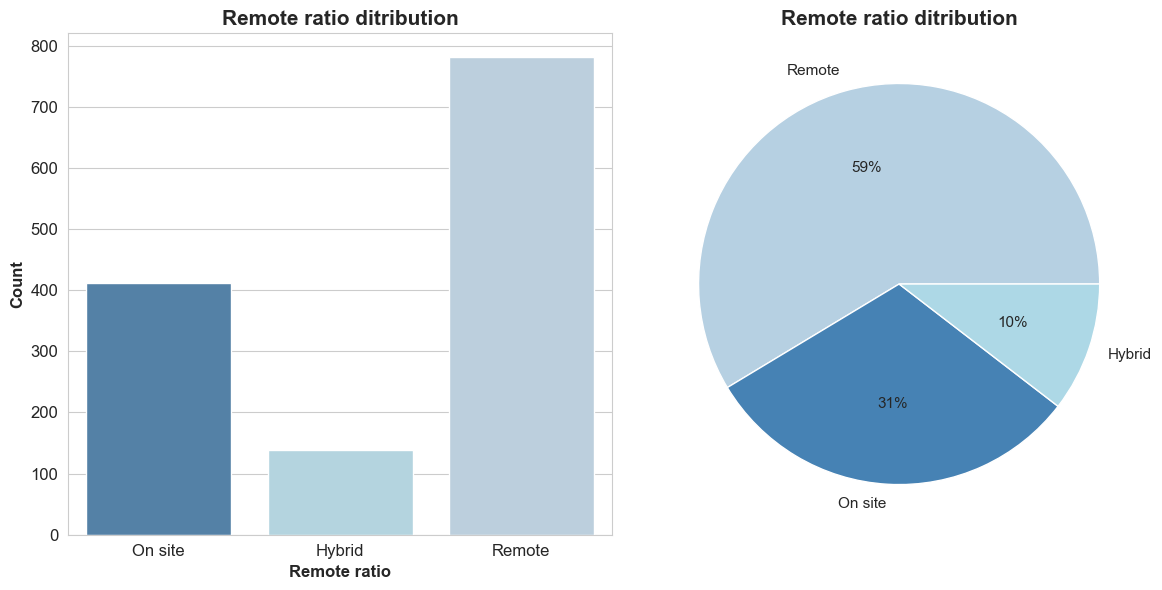

In [722]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(6)
colors=['#4682B4', 'lightblue', '#B6D0E2']
sns.countplot(x ='remote_ratio_text', data = df,order=['On site','Hybrid','Remote'],palette = colors)
plt.title("Remote ratio ditribution",fontsize=15,fontweight='bold')
plt.xlabel('Remote ratio',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=12)

plt.subplot(1, 2, 2)
plt.pie(remote_counts['Counts'],labels=remote_counts['Remote ratio'], colors=['#B6D0E2','#4682B4', 'lightblue'],textprops={"fontsize":11}, autopct='%.0f%%')
plt.title("Remote ratio ditribution",fontsize=15,fontweight='bold')
plt.tight_layout()

plt.show()

#### What is the distribution of employment type?

In [723]:
employ_counts=df['employment_type_text'].value_counts().rename_axis('Employment type').reset_index(name='Counts')
employ_counts

Employment type  Counts
0       Full-time    1306
1       Part-time      13
2        Contract       8
3       Freelance       5

There are 1306 people working full time, 13 people working part time, 8 people working with a contract and 5 people are freelancers.

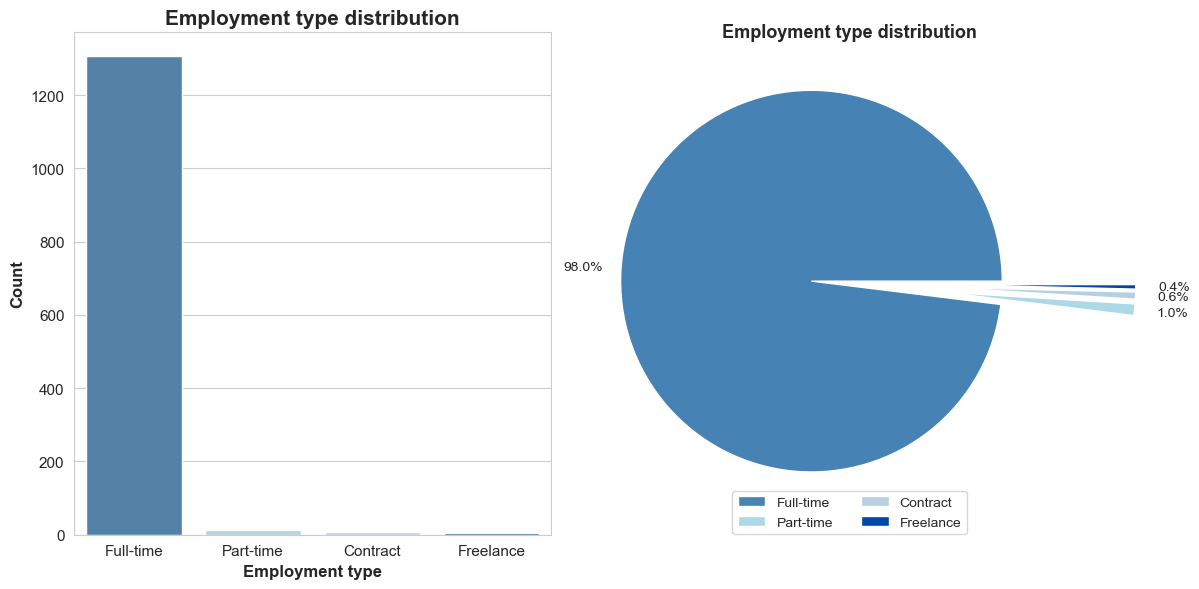

In [724]:
#visualization
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
fig.set_figheight(6)
colors=['#4682B4', 'lightblue', '#B6D0E2','#0047AB']
sns.countplot(x ='employment_type_text', data = df,palette = colors)
plt.title("Employment type distribution",fontsize=15,fontweight='bold')
plt.xlabel('Employment type',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)

plt.subplot(1, 2, 2)
#palette_color = sns.color_palette("bright")
palette_color =['#4682B4', 'lightblue', '#B6D0E2','#0047AB']
explode = [0.2, 0.5, 0.5, 0.5]

plt.pie(employ_counts['Counts'],colors=palette_color,autopct='%.1f%%',pctdistance=1.2,explode=explode)
plt.legend(labels=employ_counts['Employment type'], loc='upper center', 
            bbox_to_anchor=(0.5, 0.08),ncol=2)
plt.title("Employment type distribution",fontsize=13,fontweight='bold')
plt.tight_layout()
plt.show()

#### What is the distribution of company locations?

In [725]:
df['company_location'].value_counts().rename_axis('Company location').reset_index(name='Counts').head(10)

Company location  Counts
0               US     939
1               GB      87
2               CA      39
3               IN      36
4               DE      35
5               ES      28
6               FR      20
7               BR      14
8               GR      13
9               NL       9

As we notice, most people in the dataset, are working for US companies.

#### What is the distribution of job titles?

In [726]:
df['job_title'].value_counts().rename_axis('Job title').reset_index(name='Counts')

Job title  Counts
0                             Data Scientist     344
1                              Data Engineer     320
2                               Data Analyst     190
3                  Machine Learning Engineer      86
4                         Analytics Engineer      43
5                             Data Architect      37
6                       Data Science Manager      29
7                         Research Scientist      20
8                                ML Engineer      16
9                 Machine Learning Scientist      15
10                              AI Scientist      12
11                           BI Data Analyst      12
12                             ETL Developer      10
13                   Data Science Consultant       9
14                         Big Data Engineer       9
15        Applied Machine Learning Scientist       9
16                     Business Data Analyst       8
17                  Director of Data Science       8
18                  Data Operations Engineer       8
19                              Head of Data       7
20                    Data Analytics Manager       7
21                  Principal Data Scientist       7
22                           Data Specialist       6
23                  Data Engineering Manager       6
24                  Computer Vision Engineer       6
25                       Lead Data Scientist       6
26                    Applied Data Scientist       6
27                        Lead Data Engineer       6
28                   Data Analytics Engineer       5
29                Machine Learning Developer       5
30                              Data Manager       5
31  Machine Learning Infrastructure Engineer       5
32                                BI Analyst       4
33         Computer Vision Software Engineer       4
34                      Head of Data Science       4
35                   Data Operations Analyst       4
36                         Applied Scientist       4
37            Lead Machine Learning Engineer       3
38                         Lead Data Analyst       3
39                     Data Science Engineer       3
40             3D Computer Vision Researcher       3
41                    Financial Data Analyst       3
42                              NLP Engineer       3
43                   Principal Data Engineer       3
44                      Product Data Analyst       3
45                  Machine Learning Manager       3
46              Director of Data Engineering       2
47                    Marketing Data Analyst       2
48        Machine Learning Research Engineer       2
49                    Principal Data Analyst       2
50                       Cloud Data Engineer       2
51                        Big Data Architect       1
52                       Data Analytics Lead       1
53                      Staff Data Scientist       1
54                         Research Engineer       1
55                  Head of Machine Learning       1
56                      Cloud Data Architect       1
57                 Data Analytics Consultant       1
58                       Data Scientist Lead       1
59                  Principal Data Architect       1
60                    Product Data Scientist       1
61                        Power BI Developer       1
62                         Data Science Lead       1
63                      Finance Data Analyst       1

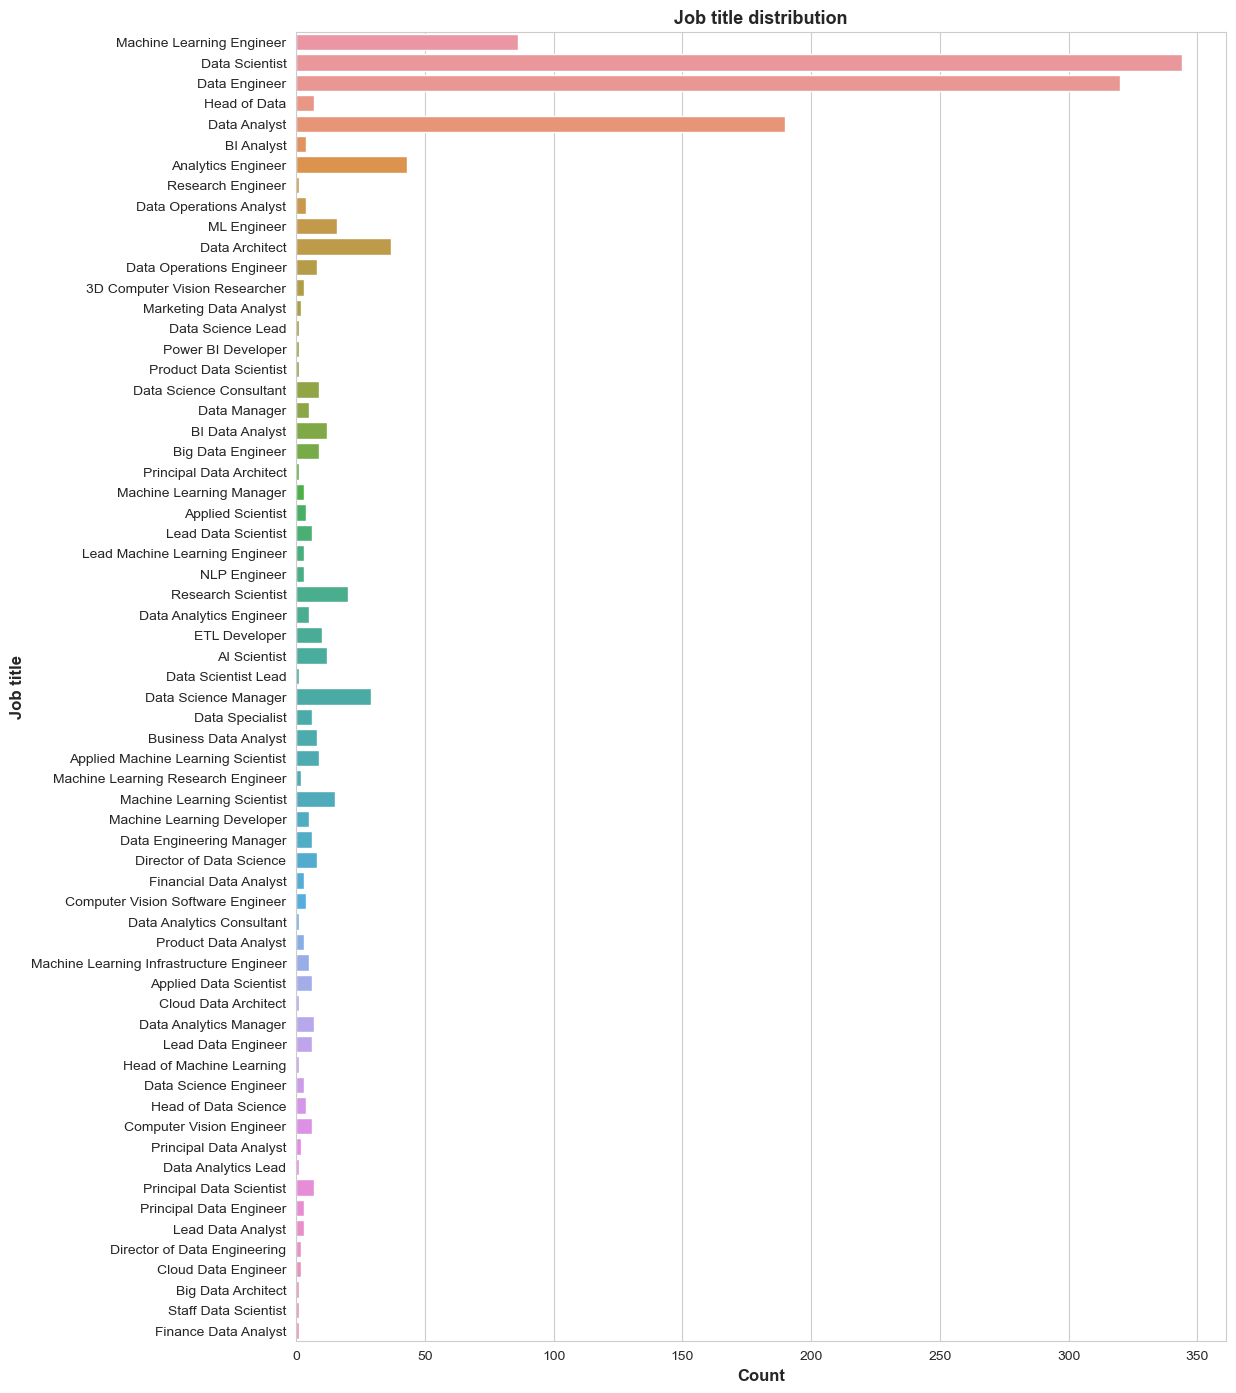

In [727]:
fig, ax = plt.subplots(figsize=(12,17))
sns.countplot(y='job_title', data = df)
plt.title("Job title distribution",fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12,fontweight='bold')
plt.ylabel('Job title',fontsize=12,fontweight='bold')
plt.show()

The top 3 jobs are:
- Data Scientists with 344 employees.
- Data Engineers with 320 employees.
- Data Analysts with 190 employees.

#### What is the distribution of salaries?

In [728]:
#sort data
df_sorted=df.sort_values(by=['salary_in_usd'],ascending=False)
df_sorted

work_year experience_level employment_type  \
1278       2021               EX              FT   
1093       2020               MI              FT   
1150       2021               MI              FT   
1324       2021               MI              FT   
1249       2021               EX              CT   
1327       2020               SE              FT   
1034       2022               SE              FT   
1039       2022               SE              FT   
122        2022               SE              FT   
1272       2020               EX              FT   
980        2022               EX              FT   
237        2022               SE              FT   
68         2022               SE              FT   
423        2022               SE              FT   
722        2022               SE              FT   
399        2022               EX              FT   
1154       2021               SE              FT   
43         2022               SE              FT   
1109       2021               MI              CT   
912        2022               SE              FT   
636        2022               EX              FT   
786        2022               SE              FT   
400        2022               EX              FT   
86         2022               SE              FT   
1181       2020               SE              FT   
1187       2021               SE              FT   
425        2022               SE              FT   
430        2022               SE              FT   
605        2022               SE              FT   
554        2022               SE              FT   
653        2022               SE              FT   
651        2022               SE              FT   
613        2022               SE              FT   
649        2022               SE              FT   
632        2021               SE              FT   
486        2022               SE              FT   
512        2022               SE              FT   
1116       2020               EN              FT   
530        2022               SE              FT   
275        2022               SE              FT   
410        2022               SE              FT   
1083       2021               EX              FT   
667        2022               SE              FT   
589        2022               SE              FT   
20         2022               SE              FT   
595        2022               SE              FT   
526        2022               SE              FT   
874        2022               SE              FT   
294        2022               SE              FT   
808        2022               EX              FT   
800        2022               MI              FT   
66         2022               MI              FT   
720        2022               SE              FT   
1036       2021               SE              FT   
28         2022               SE              FT   
292        2022               SE              FT   
132        2022               SE              FT   
56         2022               SE              FT   
1128       2021               EX              FT   
1310       2021               SE              FT   
123        2022               SE              FT   
1090       2021               EX              FT   
966        2022               SE              FT   
930        2022               SE              FT   
286        2022               SE              FT   
282        2022               SE              FT   
151        2022               SE              FT   
147        2022               SE              FT   
1131       2021               EN              FT   
60         2022               SE              FT   
207        2022               SE              FT   
1250       2021               SE              FT   
238        2022               SE              FT   
521        2022               MI              FT   
197        2022               SE              FT   
880        2022               EX              FT   
39

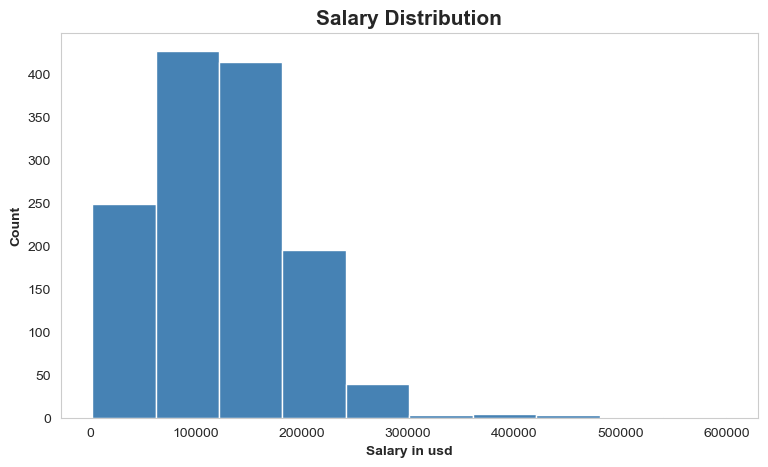

In [729]:
#visualization
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.hist(data=df, x='salary_in_usd',color='#4682B4')
plt.title("Salary Distribution",fontsize=15,fontweight='bold')
plt.xlabel('Salary in usd',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

In [730]:
#Mean salary
df['salary_in_usd'].mean()

123374.6584084084

The analysis have shown that the highest salary is 600.000\\$ USD. The mean salary is 123.374\\$ USD and the lowest is 2.324\\$ USD. However the dataset might contain outliers.

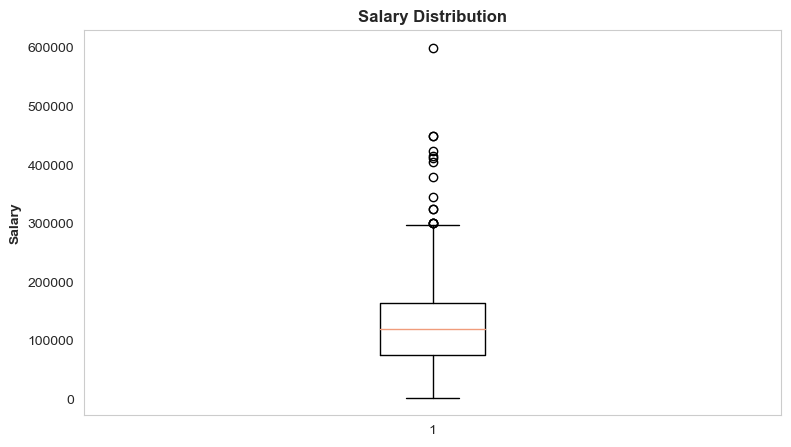

In [731]:
#check for outliers
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.boxplot(df['salary_in_usd'])
plt.title("Salary Distribution",fontweight='bold')
plt.ylabel('Salary',fontweight='bold')
plt.show()

The boxplot confirms our speculation, that the dataset has many outliers.

In [732]:
#remove outliers
df_remove=df.copy()

In [733]:
#IQR method to remove outliers 
Q1=df_remove['salary_in_usd'].quantile(0.25)
Q3=df_remove['salary_in_usd'].quantile(0.75)
IQR= Q3-Q1
lower_limit=Q1 - 1.5 * IQR  
upper_limit=Q3 + 1.5 * IQR 

In [734]:
outliers_low=(df_remove['salary_in_usd']<lower_limit)
outliers_up=(df_remove['salary_in_usd']>upper_limit)

In [735]:
#number of outliers
len(df_remove['salary_in_usd'][outliers_low | outliers_up]) 

15

In [736]:
#data without outliers
len(df_remove['salary_in_usd'][~(outliers_low | outliers_up)]) 

1317

In [737]:
df_remove=df_remove[~(outliers_low | outliers_up)]
df_remove

work_year experience_level employment_type  \
0          2022               MI              FT   
1          2022               MI              FT   
2          2022               MI              FT   
3          2022               MI              FT   
4          2022               MI              FT   
5          2022               MI              FT   
6          2022               SE              FT   
7          2022               SE              FT   
8          2022               SE              FT   
9          2022               SE              FT   
10         2022               SE              FT   
11         2022               SE              FT   
12         2022               EX              FT   
13         2022               EX              FT   
14         2022               SE              FT   
15         2022               SE              FT   
16         2022               EN              FT   
17         2022               EN              FT   
18         2022               SE              FT   
19         2022               SE              FT   
20         2022               SE              FT   
21         2022               SE              FT   
22         2022               SE              FT   
23         2022               SE              FT   
24         2022               SE              FT   
25         2022               SE              FT   
26         2022               SE              FT   
27         2022               SE              FT   
28         2022               SE              FT   
29         2022               SE              FT   
30         2022               SE              FT   
31         2022               SE              FT   
32         2022               MI              FT   
33         2022               MI              FT   
34         2022               SE              FT   
35         2022               SE              FT   
36         2022               MI              FT   
37         2022               EN              FT   
38         2022               EN              FT   
39         2022               SE              FT   
40         2022               SE              FT   
41         2022               SE              FT   
42         2022               SE              FT   
43         2022               SE              FT   
44         2022               SE              FT   
45         2022               SE              FT   
46         2022               SE              FT   
47         2022               EN              FT   
48         2022               SE              FT   
49         2022               SE              FT   
50         2022               SE              FT   
51         2022               SE              FT   
52         2022               SE              FT   
53         2022               SE              FT   
54         2022               SE              FT   
55         2022               SE              FT   
56         2022               SE              FT   
57         2022               SE              FT   
58         2022               SE              FT   
59         2022               SE              FT   
60         2022               SE              FT   
61         2022               SE              FT   
62         2022               SE              FT   
63         2022               SE              FT   
64         2022               SE              FT   
65         2022               SE              FT   
66         2022               MI              FT   
67         2022               EN              PT   
69         2022               SE              FT   
70         2022               SE              FT   
71         2022               SE              FT   
72         2022               SE              FT   
73         2022               SE              FT   
74         2022               SE              FT   
75         2022               SE              FT   
76         2022               SE              FT   
77

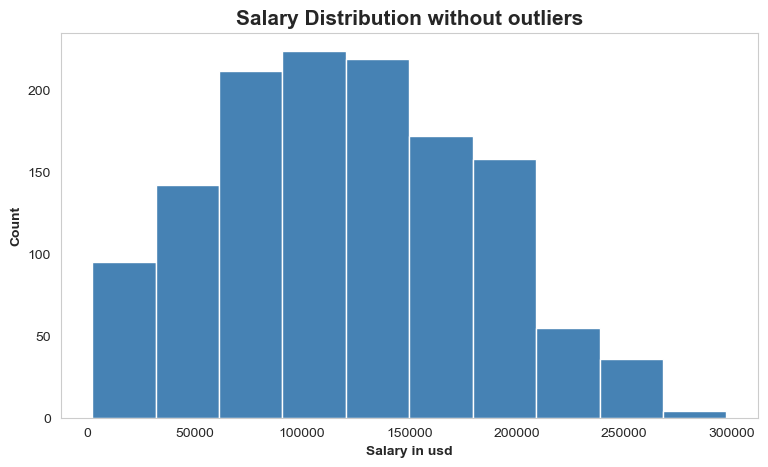

In [738]:
#histogram after the removal
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.hist(data=df_remove, x='salary_in_usd',color='#4682B4')
plt.title("Salary Distribution without outliers",fontsize=15,fontweight='bold')
plt.xlabel('Salary in usd',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

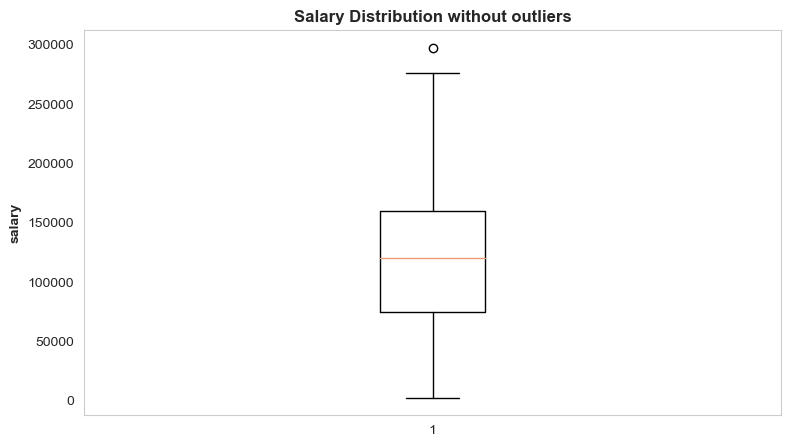

In [739]:
#boxplot after the removal
fig, ax = plt.subplots(figsize=(9,5))
plt.grid(False)
plt.boxplot(df_remove['salary_in_usd'])
plt.title("Salary Distribution without outliers",fontweight='bold')
plt.ylabel('salary',fontweight='bold')
plt.show()

In [740]:
df_sorted_rem=df_remove.sort_values(by=['salary_in_usd'],ascending=False)
df_sorted_rem

work_year experience_level employment_type  \
399        2022               EX              FT   
1154       2021               SE              FT   
43         2022               SE              FT   
1109       2021               MI              CT   
912        2022               SE              FT   
636        2022               EX              FT   
1181       2020               SE              FT   
400        2022               EX              FT   
86         2022               SE              FT   
786        2022               SE              FT   
1187       2021               SE              FT   
1116       2020               EN              FT   
512        2022               SE              FT   
651        2022               SE              FT   
425        2022               SE              FT   
653        2022               SE              FT   
613        2022               SE              FT   
530        2022               SE              FT   
632        2021               SE              FT   
605        2022               SE              FT   
554        2022               SE              FT   
410        2022               SE              FT   
1083       2021               EX              FT   
275        2022               SE              FT   
486        2022               SE              FT   
649        2022               SE              FT   
430        2022               SE              FT   
667        2022               SE              FT   
589        2022               SE              FT   
526        2022               SE              FT   
595        2022               SE              FT   
20         2022               SE              FT   
874        2022               SE              FT   
294        2022               SE              FT   
808        2022               EX              FT   
800        2022               MI              FT   
720        2022               SE              FT   
66         2022               MI              FT   
1036       2021               SE              FT   
28         2022               SE              FT   
292        2022               SE              FT   
132        2022               SE              FT   
56         2022               SE              FT   
1310       2021               SE              FT   
1128       2021               EX              FT   
123        2022               SE              FT   
966        2022               SE              FT   
930        2022               SE              FT   
1090       2021               EX              FT   
282        2022               SE              FT   
286        2022               SE              FT   
1250       2021               SE              FT   
238        2022               SE              FT   
207        2022               SE              FT   
197        2022               SE              FT   
60         2022               SE              FT   
521        2022               MI              FT   
151        2022               SE              FT   
147        2022               SE              FT   
1131       2021               EN              FT   
880        2022               EX              FT   
393        2022               EX              FT   
660        2022               SE              FT   
820        2022               SE              FT   
960        2022               SE              FT   
970        2022               SE              FT   
974        2022               SE              FT   
24         2022               SE              FT   
1045       2021               SE              FT   
310        2022               SE              FT   
550        2022               SE              FT   
624        2022               MI              FT   
981        2022               EX              FT   
626        2022               SE              FT   
782        2022               SE              FT   
736        2022               SE              FT   
42

After the removal of outliers, the highest salary changed to 297.500\\$ USD. The lowest remained the same at 2.324\\$ USD.

#### What is the mean salary after the removal of outliers?

In [741]:
df_remove['salary_in_usd'].mean()

120428.58390280942

The mean salary changed to 120.428\\$ USD.

#### What is the mean salary for each experience level?

In [742]:
exp_l=df_remove.groupby('experience_level_text')['salary_in_usd'].mean().astype('int64')
exp_l_order=exp_l.reindex(['Entry-level','Mid-level','Senior-level','Executive-level'])
exp_l_order.rename_axis('Experience level').reset_index(name='Mean salary')

Experience level  Mean salary
0      Entry-level        60133
1        Mid-level        87138
2     Senior-level       142861
3  Executive-level       172824

- Entry level employees have a mean salary of 60.133\\$ USD. <br>
- MId level employees have a mean salary of 87.138\\$ USD. <br>
- Senior level employees have a mean salary of 142.861\\$ USD. <br>
- Executive level employees have a mean salary of 172.824\\$ USD.

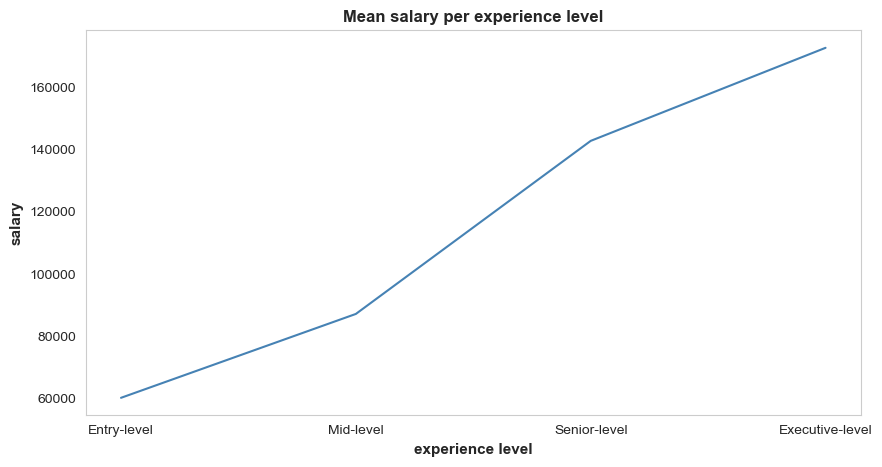

In [743]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid(False)
plt.plot(exp_l_order,color='#4682B4')
plt.title("Mean salary per experience level",fontweight='bold')
plt.xlabel('experience level',fontsize=11,fontweight='bold')
plt.ylabel('salary',fontsize=11,fontweight='bold')
plt.show()

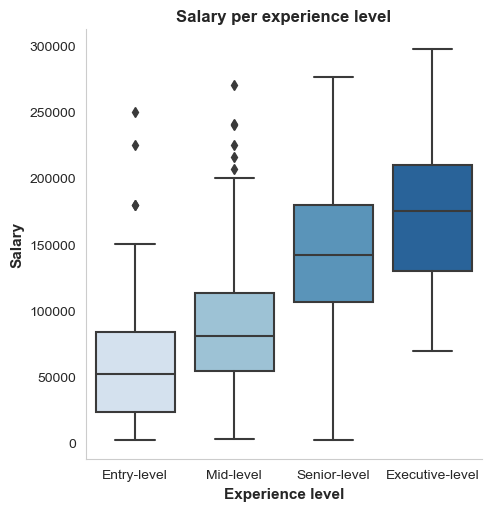

In [744]:
sns.catplot(x='experience_level_text',y='salary_in_usd',data=df_remove,kind='box',order=['Entry-level','Mid-level','Senior-level','Executive-level'],palette = 'Blues')
plt.title("Salary per experience level",fontweight='bold')
plt.xlabel('Experience level',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

The salary development appears to be associated with the experience level. The higher the experience level the higher the mean salary.

#### Is there an association between salary and remote ratio?

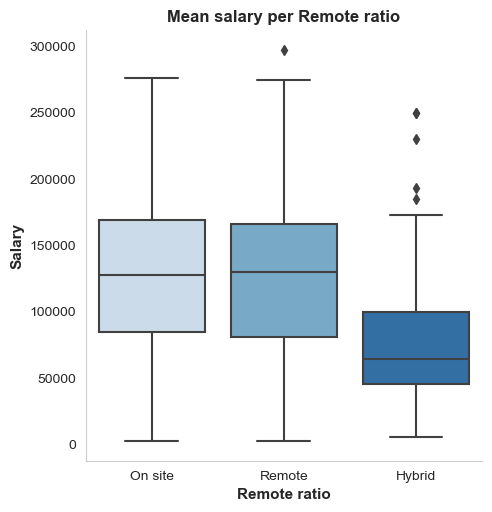

In [745]:
sns.catplot(x='remote_ratio_text',y='salary_in_usd',data=df_remove,kind='box',palette = 'Blues')
plt.title("Mean salary per Remote ratio",fontweight='bold')
plt.xlabel('Remote ratio',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

Remote ratio does not affect the salaries much, except hybrid ones. Remote and on site jobs have almost the same distribution in salaries. But they have a greater difference compared to the hybrid ones.


#### what is the association between salary and company size?


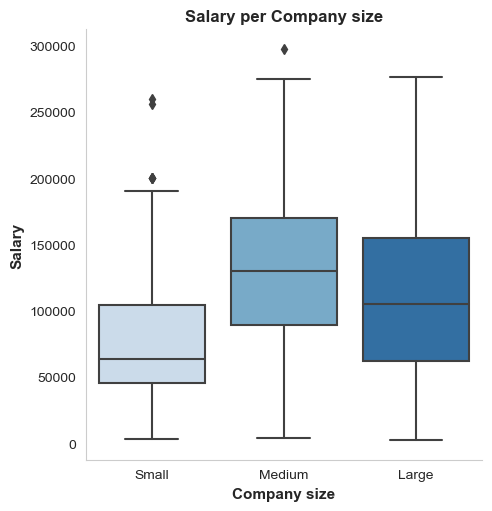

In [746]:
sns.catplot(x='company_size_text',y='salary_in_usd',data=df_remove,kind='box',order=['Small','Medium','Large'],palette = 'Blues')
plt.title("Salary per Company size",fontweight='bold')
plt.xlabel('Company size',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.grid(False)

Medium sized companies have better salaries compared to larger and smaller ones.

#### what is the association between salary and Employment type?

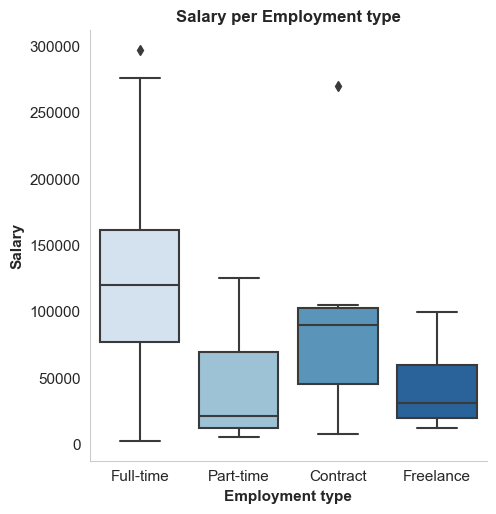

In [747]:
sns.catplot(x='employment_type_text',y='salary_in_usd',data=df_remove,kind='box',palette = 'Blues')
plt.title("Salary per Employment type",fontweight='bold')
plt.xlabel('Employment type',fontsize=11,fontweight='bold')
plt.ylabel('Salary',fontsize=11,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.grid(False)

Full time positions have better salaries compared to the other types. Followed by contract, part time and freelance positions.

#### What is the mean salary per job title?

In [790]:
df_remove.groupby('job_title')['salary_in_usd'].mean().astype('int64').sort_values(ascending=False).rename_axis('Job title').reset_index(name='Mean salary')

Job title  Mean salary
0                       Cloud Data Architect       250000
1                          Research Engineer       240000
2                    Principal Data Engineer       192500
3                        Data Scientist Lead       183000
4                   Principal Data Scientist       180641
5                       Data Science Manager       176266
6                          Applied Scientist       172150
7                               Head of Data       166346
8                          Data Science Lead       165000
9                             Data Architect       160784
10                Machine Learning Scientist       156886
11              Director of Data Engineering       156738
12                  Director of Data Science       156414
13                  Machine Learning Manager       155701
14                      Head of Data Science       146718
15                    Marketing Data Analyst       144327
16                        Lead Data Engineer       139372
17                        Analytics Engineer       136638
18                               ML Engineer       135718
19                  Data Engineering Manager       134856
20                           Data Specialist       134166
21                             ETL Developer       131475
22                 Machine Learning Engineer       128829
23  Machine Learning Infrastructure Engineer       127156
24                    Data Analytics Manager       127134
25                             Data Engineer       126955
26                            Data Scientist       125015
27                       Cloud Data Engineer       124647
28                    Principal Data Analyst       122500
29                              Data Manager       118181
30                 Data Analytics Consultant       113000
31                    Applied Data Scientist       109655
32                      Staff Data Scientist       105000
33                                BI Analyst       100500
34                        Big Data Architect        99703
35                       Lead Data Scientist        99061
36                              Data Analyst        96839
37                         Lead Data Analyst        92203
38                        Research Scientist        90918
39                   Data Operations Analyst        90562
40                Machine Learning Developer        89952
41                    Financial Data Analyst        87500
42                     Business Data Analyst        85213
43         Computer Vision Software Engineer        83704
44            Lead Machine Learning Engineer        83309
45                   Data Science Consultant        82993
46                  Data Operations Engineer        81875
47                              AI Scientist        78967
48                   Data Analytics Engineer        78839
49                  Head of Machine Learning        76967
50        Applied Machine Learning Scientist        76000
51                     Data Science Engineer        75803
52                         Big Data Engineer        64254
53                      Finance Data Analyst        61896
54                           BI Data Analyst        55803
55                      Product Data Analyst        55357
56                  Computer Vision Engineer        44419
57                  Principal Data Architect        38483
58                              NLP Engineer        33706
59        Machine Learning Research Engineer        16085
60                    Product Data Scientist         8000
61                        Power BI Developer         5409
62             3D Computer Vision Researcher         4244

Cloud Data Architects have the highest mean salary. They are followed by Research Engineers and Principal Data Engineers.

#### What is the mean salary for each job title in every experience level?

In [749]:
df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64').rename_axis(['Job title','Experience level']).reset_index(name='Mean salary')


Job title Experience level  Mean salary
0               3D Computer Vision Researcher      Entry-level         2324
1               3D Computer Vision Researcher        Mid-level         5409
2               3D Computer Vision Researcher     Senior-level         5000
3                                AI Scientist      Entry-level        24659
4                                AI Scientist  Executive-level       200000
5                                AI Scientist        Mid-level       173333
6                                AI Scientist     Senior-level        55000
7                          Analytics Engineer      Entry-level       130000
8                          Analytics Engineer  Executive-level       171166
9                          Analytics Engineer        Mid-level        82928
10                         Analytics Engineer     Senior-level       142688
11                     Applied Data Scientist      Entry-level        80018
12                     Applied Data Scientist        Mid-level       105619
13                     Applied Data Scientist     Senior-level       177000
14         Applied Machine Learning Scientist      Entry-level        30533
15         Applied Machine Learning Scientist        Mid-level        78437
16         Applied Machine Learning Scientist     Senior-level        92640
17                          Applied Scientist     Senior-level       172150
18                                 BI Analyst      Entry-level        76000
19                                 BI Analyst        Mid-level        63000
20                                 BI Analyst     Senior-level       200000
21                            BI Data Analyst      Entry-level        27137
22                            BI Data Analyst  Executive-level       150000
23                            BI Data Analyst        Mid-level        63991
24                         Big Data Architect     Senior-level        99703
25                          Big Data Engineer      Entry-level        30703
26                          Big Data Engineer        Mid-level        33537
27                          Big Data Engineer     Senior-level       128524
28                      Business Data Analyst      Entry-level        69700
29                      Business Data Analyst        Mid-level        93150
30                      Business Data Analyst     Senior-level       100000
31                       Cloud Data Architect     Senior-level       250000
32                        Cloud Data Engineer        Mid-level        89294
33                        Cloud Data Engineer     Senior-level       160000
34                   Computer Vision Engineer      Entry-level        54536
35                   Computer Vision Engineer     Senior-level        34302
36          Computer Vision Software Engineer      Entry-level        79691
37          Computer Vision Software Engineer        Mid-level        95746
38                               Data Analyst      Entry-level        51217
39                               Data Analyst  Executive-level       120000
40                               Data Analyst        Mid-level        82198
41                               Data Analyst     Senior-level       111948
42                  Data Analytics Consultant        Mid-level       113000
43                    Data Analytics Engineer      Entry-level        20000
44                    Data Analytics Engineer        Mid-level       122500
45                    Data Analytics Engineer     Senior-level        64598
46                     Data Analytics Manager     Senior-level       127134
47                             Data Architect        Mid-level       166666
48                             Data Architect     Senior-level       160250
49                              Data Engineer      Entry-level        58916
50                              Data Engineer  Executive-level       216971
51                              Data Engineer        Mid-level        83630
52      

#### what is the mean salary of Data Analysts and Data Engineers?

In [750]:
data_an=df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64'). reset_index()
d_anl=data_an[data_an['job_title']=="Data Analyst"]
df_sort_an=d_anl.sort_values('experience_level_text'
                         , key=lambda col: col.map(
                                 { 'Entry-level':1
                                  ,'Mid-level':2
                                  ,'Senior-level':3
                                  ,'Executive-level':4}))

df_sort_an.columns = df_sort_an.columns.str.replace('job_title', 'Job title')
df_sort_an.columns = df_sort_an.columns.str.replace('experience_level_text', 'Experience level')
df_sort_an.columns = df_sort_an.columns.str.replace('salary_in_usd', 'Mean salary')
df_sort_an

Job title Experience level  Mean salary
38  Data Analyst      Entry-level        51217
40  Data Analyst        Mid-level        82198
41  Data Analyst     Senior-level       111948
39  Data Analyst  Executive-level       120000

In [751]:
data_en=df_remove.groupby(['job_title','experience_level_text'])['salary_in_usd'].mean().astype('int64'). reset_index()
d_eng=data_en[data_en['job_title']=="Data Engineer"]
df_sort_eng=d_eng.sort_values('experience_level_text'
                         , key=lambda col: col.map(
                               { 'Entry-level':1
                                  ,'Mid-level':2
                                  ,'Senior-level':3
                                  ,'Executive-level':4}))
df_sort_eng.columns = df_sort_eng.columns.str.replace('job_title', 'Job title')
df_sort_eng.columns = df_sort_eng.columns.str.replace('experience_level_text', 'Experience level')
df_sort_eng.columns = df_sort_eng.columns.str.replace('salary_in_usd', 'Mean salary')                                
df_sort_eng

Job title Experience level  Mean salary
49  Data Engineer      Entry-level        58916
51  Data Engineer        Mid-level        83630
52  Data Engineer     Senior-level       147340
50  Data Engineer  Executive-level       216971

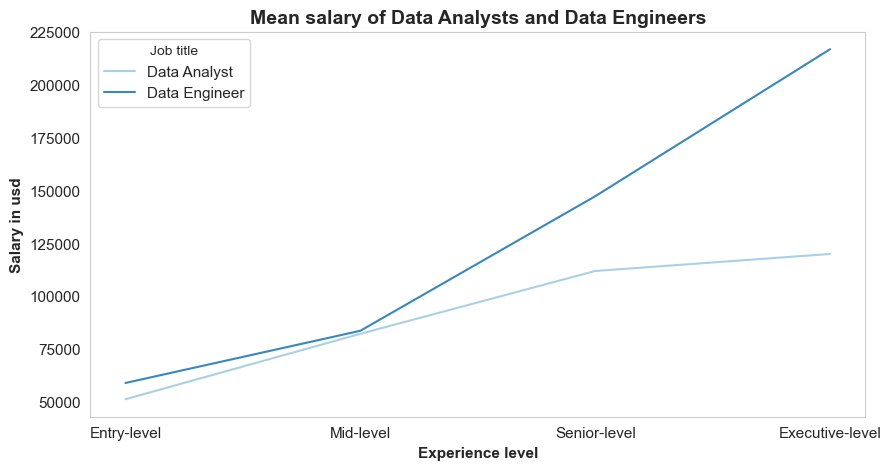

In [752]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid(False)
dfgh = pd.concat([df_sort_an, df_sort_eng]).reset_index(drop=True)
sns.lineplot(x='Experience level',y='Mean salary',data=dfgh,hue='Job title',palette = 'Blues')
plt.title('Mean salary of Data Analysts and Data Engineers',fontsize=14,fontweight='bold')
plt.xlabel('Experience level',fontsize=11,fontweight='bold')
plt.ylabel('Salary in usd',fontsize=11,fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.legend(title='Job title', fontsize=11)

As we observe Data engineers have better salary development compared to Data analysts.

#### what is the distribution of the remote ratio, each year, for every experience level?

In [753]:
df_remote=df_remove.groupby(['remote_ratio_text','work_year','experience_level_text']).size().rename_axis(['Remote ratio','Work Year','Experience level']).reset_index(name='Counts')
df_remote.sort_values(by='Counts',ascending=False)

Remote ratio  Work Year Experience level  Counts
33       Remote       2022     Senior-level     433
22      On site       2022     Senior-level     265
32       Remote       2022        Mid-level     121
21      On site       2022        Mid-level      75
28       Remote       2021        Mid-level      45
30       Remote       2022      Entry-level      42
29       Remote       2021     Senior-level      42
6        Hybrid       2021        Mid-level      29
26       Remote       2021      Entry-level      27
31       Remote       2022  Executive-level      21
4        Hybrid       2021      Entry-level      21
7        Hybrid       2021     Senior-level      20
10       Hybrid       2022        Mid-level      18
8        Hybrid       2022      Entry-level      16
24       Remote       2020        Mid-level      16
17      On site       2021        Mid-level      15
23       Remote       2020      Entry-level      13
19      On site       2022      Entry-level      12
18      On site       2021     Senior-level      10
25       Remote       2020     Senior-level       8
11       Hybrid       2022     Senior-level       8
2        Hybrid       2020        Mid-level       8
20      On site       2022  Executive-level       7
13      On site       2020        Mid-level       7
3        Hybrid       2020     Senior-level       6
0        Hybrid       2020      Entry-level       6
15      On site       2021      Entry-level       6
12      On site       2020      Entry-level       4
27       Remote       2021  Executive-level       4
9        Hybrid       2022  Executive-level       3
14      On site       2020     Senior-level       3
16      On site       2021  Executive-level       3
5        Hybrid       2021  Executive-level       2
1        Hybrid       2020  Executive-level       1

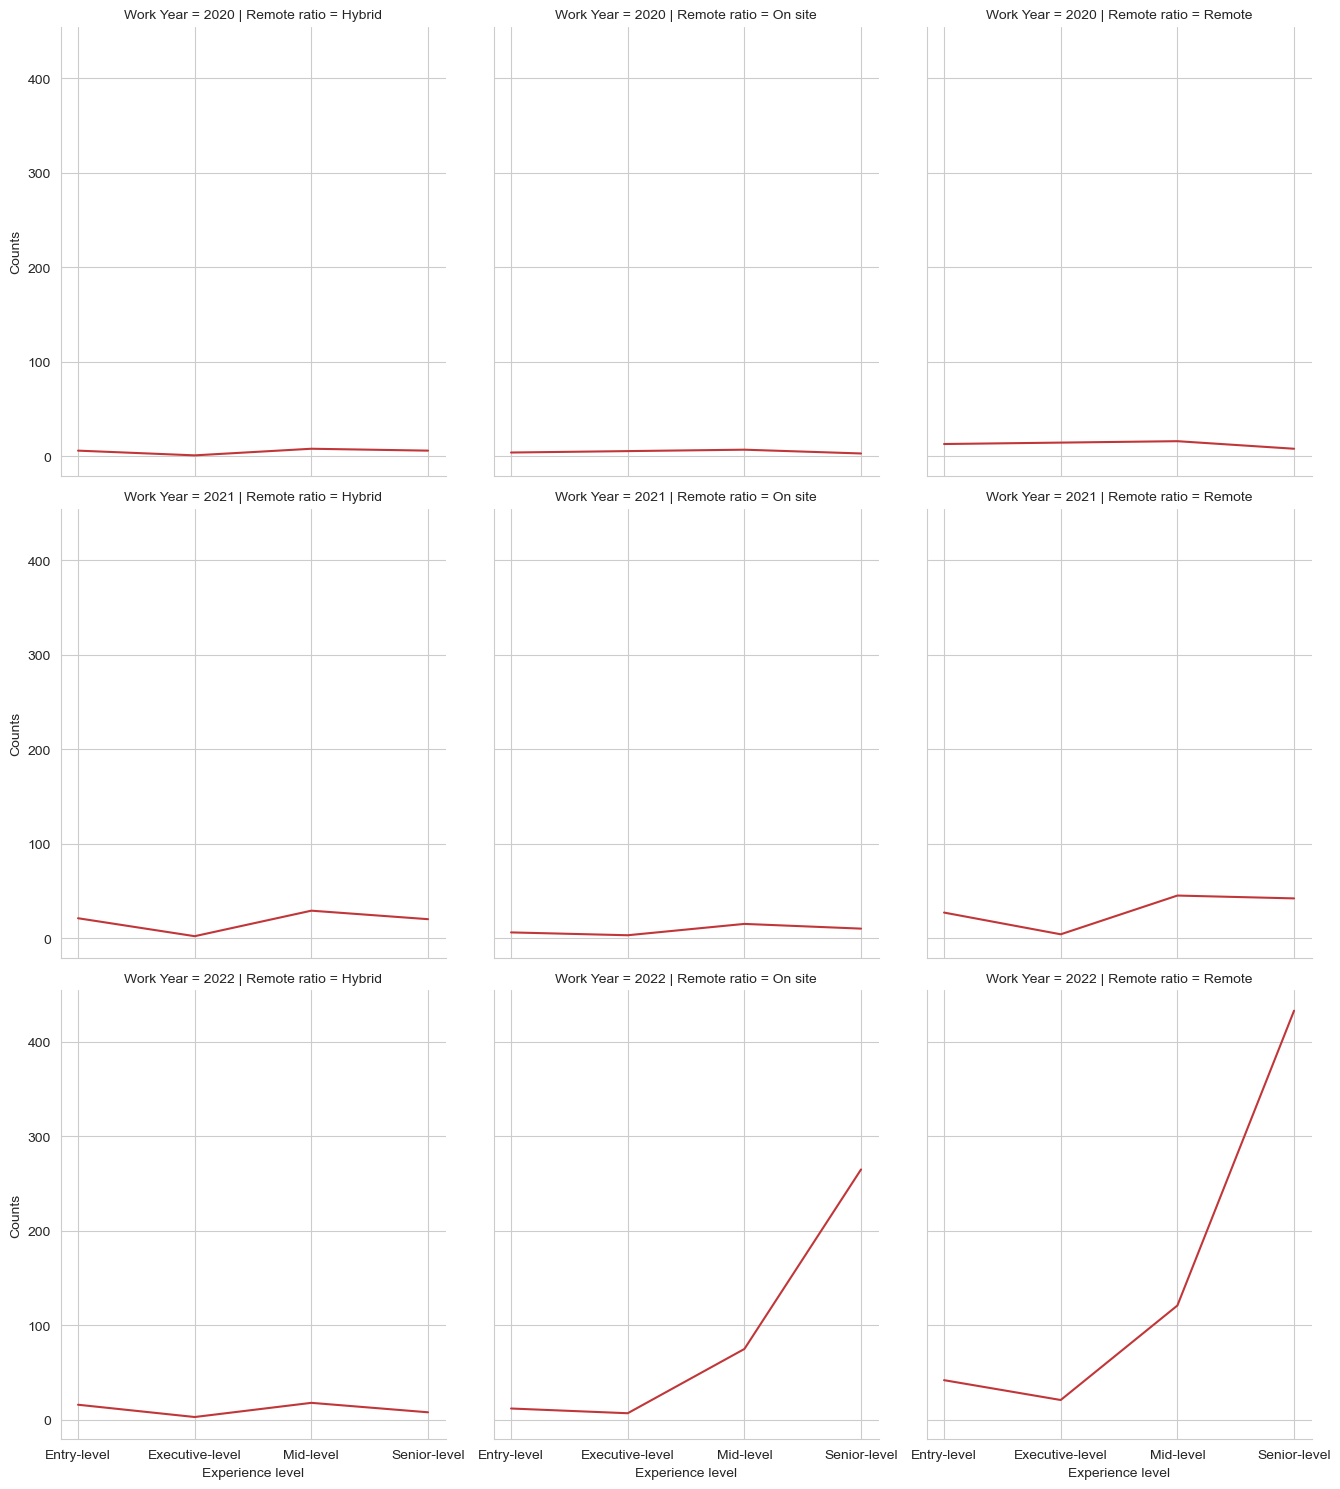

In [754]:
sns.set_palette("RdBu")
sns.relplot(x='Experience level',y='Counts',data=df_remote,kind='line',col='Remote ratio',row='Work Year',aspect=0.9)
plt.show()

As we notice, most seniors are working remotely in 2022. Followed by seniors that are working on site and mid-levels working remotely.

#### What is the mean salary of data related jobs in every country?

In [755]:
#ATTENTION:the code below takes some time to run
#convert country codes in country names (code for country converter: conda install country_converter)
df_remove['country_code'] = df_remove['company_location'].apply(coco.convert)  #convert Alpha-2 codes to Alpha-3 codes
df_remove['country_name'] = df_remove['company_location'].apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
df_remove.head()

work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_location company_size experience_level_text employment_type_text  \
0               US            M             Mid-level            Full-time   
1               US            M             Mid-level            Full-time   
2               US            M             Mid-level            Full-time   
3               US            M             Mid-level            Full-time   
4               US            M             Mid-level            Full-time   

  remote_ratio_text company_size_text country_code   country_name  
0           On site            Medium          USA  United States  
1           On site            Medium          USA  United States  
2            Remote            Medium          USA  United States  
3            Remote            Medium          USA  United States  
4            Remote            Medium          USA  United States

In [756]:
country_mean=df_remove.groupby(['country_name','country_code'])['salary_in_usd'].mean().astype('int64').rename_axis(['Country name','Country code']).reset_index(name='Mean salary')
country_mean.sort_values(by='Mean salary',ascending=False)

Country name Country code  Mean salary
45           Puerto Rico          PRI       167500
47                Russia          RUS       157500
57         United States          USA       142938
39           New Zealand          NZL       125000
29                Israel          ISR       119059
31                 Japan          JPN       114127
9                 Canada          CAN       108282
1                Algeria          DZA       100000
27                  Iraq          IRQ       100000
55  United Arab Emirates          ARE       100000
40               Nigeria          NGA        86666
4              Australia          AUS        83675
56        United Kingdom          GBR        82696
20               Germany          DEU        79646
6                Belgium          BEL        76936
11                 China          CHN        71665
38           Netherlands          NLD        70570
28               Ireland          IRL        68436
5                Austria          AUT        67790
43                Poland          POL        65605
49              Slovenia          SVN        63831
18               Finland          FIN        63172
51           Switzerland          CHE        63051
19                France          FRA        60455
46               Romania          ROU        60000
21                Greece          GRC        54883
48             Singapore          SGP        54151
3              Argentina          ARG        50000
42           Philippines          PHL        50000
50                 Spain          ESP        49343
44              Portugal          PRT        47323
13               Croatia          HRV        45618
15               Denmark          DNK        45558
33            Luxembourg          LUX        43942
8                 Brazil          BRA        41597
10                 Chile          CHL        40038
34              Malaysia          MYS        40000
30                 Italy          ITA        36366
23               Hungary          HUN        35735
14        Czech Republic          CZE        35221
25             Indonesia          IDN        34438
2         American Samoa          ASM        34026
36                Mexico          MEX        31592
17               Estonia          EST        31586
35                 Malta          MLT        28369
24                 India          IND        26072
16                 Egypt          EGY        22800
12              Colombia          COL        21844
22              Honduras          HND        20000
53               Türkiye          TUR        19058
37               Moldova          MDA        18000
52              Thailand          THA        15000
54               Ukraine          UKR        13400
41              Pakistan          PAK        13333
32                 Kenya          KEN         9272
7                Bolivia          BOL         7500
58               Vietnam          VNM         4000
26                  Iran          IRN         4000
0                Albania          ALB         2324

In [757]:
#visualize world map (plotly code: conda install -c plotly plotly) 
fig = px.choropleth(country_mean, locations="Country code",
                    color="Mean salary", 
                    hover_name="Country name", #hover information
                    color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary per country ')
fig.show()

The country with the highest mean salary is Puerto Rico, followed by Russia and United States.

In [758]:
#records per country 
df_remove['country_name'].value_counts().rename_axis('Country').reset_index(name='Number of records')

Country  Number of records
0          United States                924
1         United Kingdom                 87
2                 Canada                 39
3                  India                 36
4                Germany                 35
5                  Spain                 28
6                 France                 20
7                 Brazil                 14
8                 Greece                 13
9            Netherlands                  9
10             Australia                  9
11              Portugal                  9
12                 Japan                  6
13               Austria                  5
14               Türkiye                  5
15               Denmark                  4
16                Poland                  4
17               Belgium                  4
18           Puerto Rico                  4
19                Mexico                  4
20            Luxembourg                  3
21               Nigeria                  3
22             Singapore                  3
23  United Arab Emirates                  3
24              Pakistan                  3
25        Czech Republic                  3
26                 Italy                  2
27        American Samoa                  2
28             Indonesia                  2
29           Switzerland                  2
30                Russia                  2
31                 China                  2
32              Slovenia                  2
33               Hungary                  1
34                 Kenya                  1
35               Vietnam                  1
36              Colombia                  1
37           New Zealand                  1
38                  Iran                  1
39                 Chile                  1
40               Moldova                  1
41               Croatia                  1
42                Israel                  1
43               Ukraine                  1
44                 Egypt                  1
45                  Iraq                  1
46               Romania                  1
47               Algeria                  1
48              Honduras                  1
49               Estonia                  1
50              Malaysia                  1
51               Ireland                  1
52             Argentina                  1
53               Albania                  1
54           Philippines                  1
55               Bolivia                  1
56              Thailand                  1
57               Finland                  1
58                 Malta                  1

As we notice, some countries have only one record.

In [759]:
#remove countries with only one record
keep_dupes=df_remove[df_remove.duplicated(subset='country_name', keep=False)] #keep=false means that all duplicates are True
keep_dupes.head()

work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_location company_size experience_level_text employment_type_text  \
0               US            M             Mid-level            Full-time   
1               US            M             Mid-level            Full-time   
2               US            M             Mid-level            Full-time   
3               US            M             Mid-level            Full-time   
4               US            M             Mid-level            Full-time   

  remote_ratio_text company_size_text country_code   country_name  
0           On site            Medium          USA  United States  
1           On site            Medium          USA  United States  
2            Remote            Medium          USA  United States  
3            Remote            Medium          USA  United States  
4            Remote            Medium          USA  United States

In [760]:
keep_dupes['country_name'].value_counts().rename_axis('Country').reset_index(name='Number of records')

Country  Number of records
0          United States                924
1         United Kingdom                 87
2                 Canada                 39
3                  India                 36
4                Germany                 35
5                  Spain                 28
6                 France                 20
7                 Brazil                 14
8                 Greece                 13
9              Australia                  9
10              Portugal                  9
11           Netherlands                  9
12                 Japan                  6
13               Austria                  5
14               Türkiye                  5
15           Puerto Rico                  4
16               Denmark                  4
17               Belgium                  4
18                Mexico                  4
19                Poland                  4
20        Czech Republic                  3
21               Nigeria                  3
22             Singapore                  3
23  United Arab Emirates                  3
24            Luxembourg                  3
25              Pakistan                  3
26           Switzerland                  2
27                Russia                  2
28        American Samoa                  2
29              Slovenia                  2
30                 Italy                  2
31             Indonesia                  2
32                 China                  2

In [761]:
countries_mean_dup=keep_dupes.groupby(['country_name','country_code'])['salary_in_usd'].mean().astype('int64').rename_axis(['Country name','Country code']).reset_index(name='Mean salary')
countries_mean_dup.sort_values(by='Mean salary',ascending=False)

Country name Country code  Mean salary
23           Puerto Rico          PRI       167500
24                Russia          RUS       157500
32         United States          USA       142938
15                 Japan          JPN       114127
5                 Canada          CAN       108282
30  United Arab Emirates          ARE       100000
19               Nigeria          NGA        86666
1              Australia          AUS        83675
31        United Kingdom          GBR        82696
10               Germany          DEU        79646
3                Belgium          BEL        76936
6                  China          CHN        71665
18           Netherlands          NLD        70570
2                Austria          AUT        67790
21                Poland          POL        65605
26              Slovenia          SVN        63831
28           Switzerland          CHE        63051
9                 France          FRA        60455
11                Greece          GRC        54883
25             Singapore          SGP        54151
27                 Spain          ESP        49343
22              Portugal          PRT        47323
8                Denmark          DNK        45558
16            Luxembourg          LUX        43942
4                 Brazil          BRA        41597
14                 Italy          ITA        36366
7         Czech Republic          CZE        35221
13             Indonesia          IDN        34438
0         American Samoa          ASM        34026
17                Mexico          MEX        31592
12                 India          IND        26072
29               Türkiye          TUR        19058
20              Pakistan          PAK        13333

In [762]:
#visualization
fig = px.choropleth(countries_mean_dup, locations="Country code",
                    color="Mean salary", 
                    hover_name="Country name", #hover information
                    color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary per country excluding the countries with only one record')
fig.show()

#### What is the mean salary in every european country?

In [763]:
#convert country to continent (code: pip install pycountry-convert) 
df_remove['continent_code'] = [pc.country_alpha2_to_continent_code(x) 
                                                                    for x in df_remove['company_location']]
df_remove['continent_name'] = [pc.convert_continent_code_to_continent_name(x) 
                                                                    for x in df_remove['continent_code']]
df_remove.head()

work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_location company_size experience_level_text employment_type_text  \
0               US            M             Mid-level            Full-time   
1               US            M             Mid-level            Full-time   
2               US            M             Mid-level            Full-time   
3               US            M             Mid-level            Full-time   
4               US            M             Mid-level            Full-time   

  remote_ratio_text company_size_text country_code   country_name  \
0           On site            Medium          USA  United States   
1           On site            Medium          USA  United States   
2            Remote            Medium          USA  United States   
3            Remote            Medium          USA  United States   
4            Remote            Medium          USA  United States   

  continent_code continent_name  
0             NA  North America  
1             NA  North America  
2             NA  North America  
3             NA  North America  
4             NA  North America

In [764]:
european=df_remove[df_remove['continent_name']=='Europe']
european.groupby(['country_name'])['salary_in_usd'].mean().astype('int64').rename_axis('Country').reset_index(name='Mean salary').sort_values(by='Mean salary',ascending=False)

Country  Mean salary
21          Russia       157500
26  United Kingdom        82696
9          Germany        79646
2          Belgium        76936
17     Netherlands        70570
12         Ireland        68436
1          Austria        67790
18          Poland        65605
22        Slovenia        63831
7          Finland        63172
24     Switzerland        63051
8           France        60455
20         Romania        60000
10          Greece        54883
23           Spain        49343
19        Portugal        47323
3          Croatia        45618
5          Denmark        45558
14      Luxembourg        43942
13           Italy        36366
11         Hungary        35735
4   Czech Republic        35221
6          Estonia        31586
15           Malta        28369
16         Moldova        18000
25         Ukraine        13400
0          Albania         2324

In [765]:
#visualize european map 
fig = px.choropleth(country_mean,locations='Country code', color='Mean salary',hover_name="Country name", scope="europe",color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary in European countries')
fig.show()

In [766]:
fig = px.choropleth(countries_mean_dup,locations='Country code', color='Mean salary',hover_name="Country name", scope="europe",color_continuous_scale='blues')
fig.update_layout(
    title_text = 'Mean salary in European countries excluding the countries with only one record')
fig.show()

The European country with the highest mean salary is Russia, followed by UK and Germany.

#### What is the mean salary of data related jobs in Germany, in every experience level?

In [767]:
eur=european.groupby(['country_name','experience_level_text','remote_ratio_text'])['salary_in_usd'].mean().astype('int64').reset_index()
eur.columns = eur.columns.str.replace('country_name', 'Country')
eur.columns = eur.columns.str.replace('experience_level_text', 'Experience level')
eur.columns = eur.columns.str.replace('remote_ratio_text', 'Remote ratio')
eur.columns = eur.columns.str.replace('salary_in_usd', 'Mean salary')
eur

Country Experience level Remote ratio  Mean salary
0          Albania      Entry-level      On site         2324
1          Austria      Entry-level       Hybrid        50000
2          Austria        Mid-level       Hybrid        67798
3          Austria        Mid-level      On site        62119
4          Austria     Senior-level      On site        91237
5          Belgium      Entry-level       Hybrid        52117
6          Belgium      Entry-level       Remote        84229
7          Belgium        Mid-level       Remote        88654
8          Belgium     Senior-level       Hybrid        82744
9          Croatia     Senior-level       Remote        45618
10  Czech Republic      Entry-level       Remote        30533
11  Czech Republic        Mid-level       Hybrid        69999
12  Czech Republic        Mid-level       Remote         5132
13         Denmark      Entry-level       Hybrid        31192
14         Denmark     Senior-level       Remote        88654
15         Estonia        Mid-level       Remote        31586
16         Finland     Senior-level       Hybrid        63172
17          France      Entry-level       Hybrid        38971
18          France      Entry-level      On site        45618
19          France      Entry-level       Remote       110000
20          France        Mid-level       Hybrid        55696
21          France        Mid-level       Remote        65278
22          France     Senior-level       Hybrid        69569
23          France     Senior-level       Remote       152000
24         Germany      Entry-level       Hybrid        53278
25         Germany      Entry-level      On site        63050
26         Germany      Entry-level       Remote        57626
27         Germany  Executive-level       Hybrid       130026
28         Germany  Executive-level      On site       141846
29         Germany        Mid-level       Hybrid        77713
30         Germany        Mid-level      On site        96802
31         Germany        Mid-level       Remote        59412
32         Germany     Senior-level       Hybrid        79197
33         Germany     Senior-level      On site        84229
34         Germany     Senior-level       Remote       139261
35          Greece        Mid-level      On site        52643
36          Greece        Mid-level       Remote        56030
37          Greece     Senior-level       Hybrid        47899
38         Hungary        Mid-level       Hybrid        35735
39         Ireland     Senior-level       Remote        68436
40           Italy      Entry-level       Hybrid        21669
41           Italy        Mid-level       Hybrid        51064
42      Luxembourg      Entry-level       Remote        34551
43      Luxembourg        Mid-level       Hybrid        62726
44           Malta        Mid-level       Hybrid        28369
45         Moldova        Mid-level      On site        18000
46     Netherlands      Entry-level       Hybrid        42000
47     Netherlands  Executive-level      On site        84229
48     Netherlands        Mid-level       Hybrid        73701
49     Netherlands        Mid-level      On site       102655
50     Netherlands        Mid-level       Remote        56627
51     Netherlands     Senior-level       Remote        60013
52          Poland  Executive-level       Remote       153667
53          Poland        Mid-level       Remote        36251
54        Portugal      Entry-level       Remote        21933
55        Portugal        Mid-level       Hybrid        55802
56        Portugal        Mid-level      On site        50180
57        Portugal     Senior-level       Hybrid        45381
58        Portugal     Senior-level      On site        57907
59        Portugal     Senior-level       Remote        69489
60         Romania        Mid-level       Hybrid        60000
61          Russia  Executive-level       Hybrid       230000
62          Russia  Executive-level      On site        85000
63        Slovenia        Mid-level       H

In [768]:
eur_germany=eur[eur['Country']=='Germany']
eur_germany.loc[eur_germany.duplicated(subset='Country'), 'Country'] = '' # display country name once
eur_germany

Country Experience level Remote ratio  Mean salary
24  Germany      Entry-level       Hybrid        53278
25               Entry-level      On site        63050
26               Entry-level       Remote        57626
27           Executive-level       Hybrid       130026
28           Executive-level      On site       141846
29                 Mid-level       Hybrid        77713
30                 Mid-level      On site        96802
31                 Mid-level       Remote        59412
32              Senior-level       Hybrid        79197
33              Senior-level      On site        84229
34              Senior-level       Remote       139261

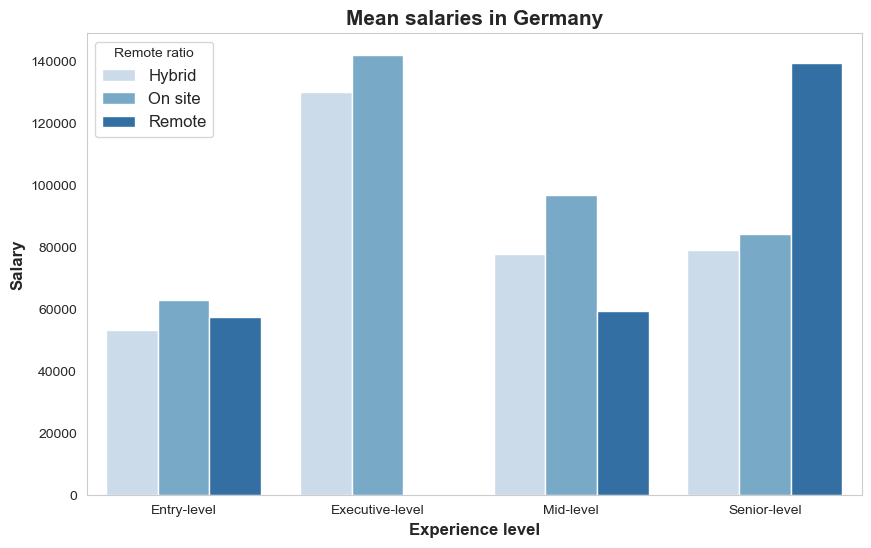

In [769]:
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(False)
sns.barplot(x='Experience level',y='Mean salary',data=eur_germany,hue='Remote ratio',palette = 'Blues')
plt.title('Mean salaries in Germany',fontsize=15,fontweight='bold')
plt.xlabel('Experience level',fontsize=12,fontweight='bold')
plt.ylabel('Salary',fontsize=12,fontweight='bold')
plt.legend(title='Remote ratio', fontsize=12)

Executive level employees, working on site, have the highest salaries. Followed by senior level employees working remotely. 

#### what is the mean salary of junior data analysts and junior data engineers in every country?

In [770]:
data_an=df_remove.groupby(['job_title','experience_level_text','country_name'])['salary_in_usd'].mean().astype('int64').reset_index(name='Mean salary') 
data_an.columns = data_an.columns.str.replace('job_title', 'Job title')
data_an.columns = data_an.columns.str.replace('experience_level_text', 'Experience level')
data_an.columns = data_an.columns.str.replace('country_name', 'Country')
data_an

Job title Experience level  \
0               3D Computer Vision Researcher      Entry-level   
1               3D Computer Vision Researcher        Mid-level   
2               3D Computer Vision Researcher     Senior-level   
3                                AI Scientist      Entry-level   
4                                AI Scientist      Entry-level   
5                                AI Scientist      Entry-level   
6                                AI Scientist      Entry-level   
7                                AI Scientist      Entry-level   
8                                AI Scientist  Executive-level   
9                                AI Scientist        Mid-level   
10                               AI Scientist     Senior-level   
11                         Analytics Engineer      Entry-level   
12                         Analytics Engineer  Executive-level   
13                         Analytics Engineer        Mid-level   
14                         Analytics Engineer        Mid-level   
15                         Analytics Engineer        Mid-level   
16                         Analytics Engineer     Senior-level   
17                         Analytics Engineer     Senior-level   
18                     Applied Data Scientist      Entry-level   
19                     Applied Data Scientist      Entry-level   
20                     Applied Data Scientist        Mid-level   
21                     Applied Data Scientist        Mid-level   
22                     Applied Data Scientist     Senior-level   
23         Applied Machine Learning Scientist      Entry-level   
24         Applied Machine Learning Scientist        Mid-level   
25         Applied Machine Learning Scientist        Mid-level   
26         Applied Machine Learning Scientist     Senior-level   
27         Applied Machine Learning Scientist     Senior-level   
28                          Applied Scientist     Senior-level   
29                                 BI Analyst      Entry-level   
30                                 BI Analyst        Mid-level   
31                                 BI Analyst     Senior-level   
32                            BI Data Analyst      Entry-level   
33                            BI Data Analyst      Entry-level   
34                            BI Data Analyst      Entry-level   
35                            BI Data Analyst      Entry-level   
36                            BI Data Analyst  Executive-level   
37                            BI Data Analyst        Mid-level   
38                            BI Data Analyst        Mid-level   
39                            BI Data Analyst        Mid-level   
40                         Big Data Architect     Senior-level   
41                          Big Data Engineer      Entry-level   
42                          Big Data Engineer      Entry-level   
43                          Big Data Engineer      Entry-level   
44                          Big Data Engineer        Mid-level   
45                          Big Data Engineer        Mid-level   
46                          Big Data Engineer        Mid-level   
47                          Big Data Engineer     Senior-level   
48                          Big Data Engineer     Senior-level   
49                      Business Data Analyst      Entry-level   
50                      Business Data Analyst      Entry-level   
51                      Business Data Analyst      Entry-level   
52                      Business Data Analyst        Mid-level   
53                      Business Data Analyst        Mid-level   
54                      Business Data Analyst        Mid-level   
55                      Business Data Analyst     Senior-level   
56                       Cloud Data Architect     Senior-level   
57                        Cloud Data Engineer        Mid-level   
58                        Cloud Data Engineer     Senior-level   
59                   Computer Vision Engineer      Entry-level   
60        

In [785]:
data_an_con=data_an[(data_an['Job title'] == 'Data Analyst') & (data_an['Experience level'] == 'Entry-level')]
data_an_con

Job title Experience level        Country  Mean salary
68  Data Analyst      Entry-level      Argentina        50000
69  Data Analyst      Entry-level      Australia        42028
70  Data Analyst      Entry-level         Brazil         7828
71  Data Analyst      Entry-level         Canada        59500
72  Data Analyst      Entry-level         France        43764
73  Data Analyst      Entry-level          India         6242
74  Data Analyst      Entry-level      Indonesia        15000
75  Data Analyst      Entry-level        Nigeria        10000
76  Data Analyst      Entry-level       Portugal        22809
77  Data Analyst      Entry-level          Spain        10354
78  Data Analyst      Entry-level  United States        75283

In [786]:
data_en_con=data_an[(data_an['Job title'] == 'Data Engineer') & (data_an['Experience level'] == 'Entry-level')]
data_en_con

Job title Experience level         Country  Mean salary
104  Data Engineer      Entry-level         Germany        58448
105  Data Engineer      Entry-level           India        19762
106  Data Engineer      Entry-level           Japan        41689
107  Data Engineer      Entry-level  United Kingdom        49950
108  Data Engineer      Entry-level   United States        90357

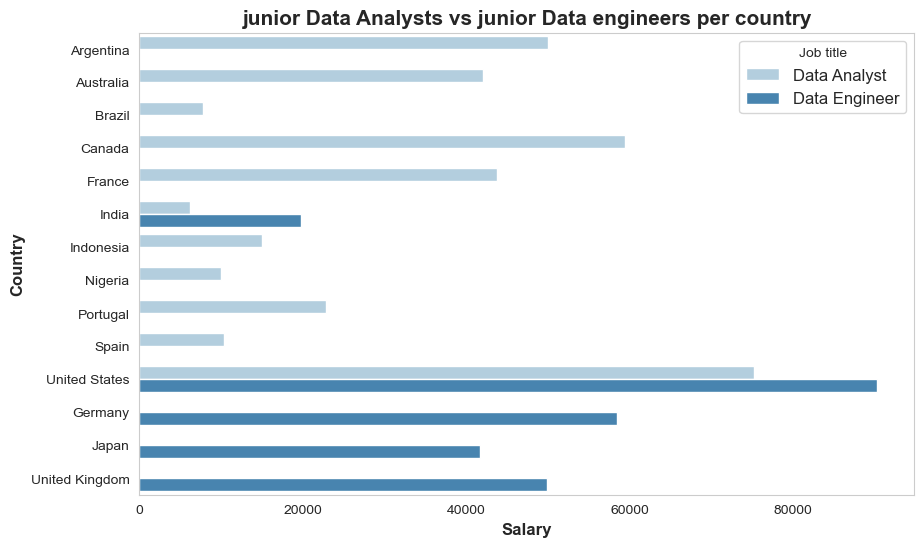

In [787]:
#visualization
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(False)
data_eng_an=pd.concat([data_an_con,data_en_con]).reset_index(drop=True)
sns.barplot(x='Mean salary',y='Country',data=data_eng_an,hue='Job title',palette = 'Blues')
plt.title('junior Data Analysts vs junior Data engineers per country',fontsize=15,fontweight='bold')
plt.xlabel('Salary',fontsize=12,fontweight='bold')
plt.ylabel('Country',fontsize=12,fontweight='bold')
plt.legend(title='Job title', fontsize=12)

Data Engineers have relatively higher salaries compared to Data analysts.